# Covid-19 Classification with VGG 16

## Importing Libraries

## Multi Classification

In [19]:

import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Loading the dataset

In [20]:
# Mount G drive
# !pip freeze > requirement.txt
#from google.colab import drive
#drive.mount('/content/drive')

In [21]:
image = keras.utils.load_img("C:\github_project\Coding_test\텐서플로우기초\Covid19-dataset\\test\Covid\\094.png")

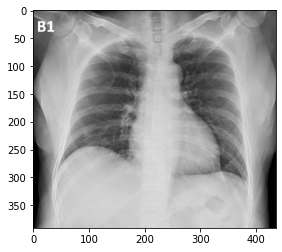

In [22]:
plt.imshow(image)

In [23]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [27]:
train_dataset = train.flow_from_directory("..\텐서플로우기초\Covid19-dataset\\test",
                                          target_size = (224, 224),
                                          batch_size = 10)
                                     
test_dataset = test.flow_from_directory("..\텐서플로우기초\Covid19-dataset\\train",
                                          target_size= (224, 224),
                                          batch_size = 10 )

Found 66 images belonging to 3 classes.
Found 251 images belonging to 3 classes.


In [28]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [29]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## VGG 16 model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),

   

  
])

In [ ]:
## Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Passing data to model 

In [ ]:
model_fit = model.fit(train_dataset,
            steps_per_epoch = 3,
            epochs = 10,
            validation_data = test_dataset)